<a href="https://colab.research.google.com/github/Paarthaenon/Adv.-ML-Public-Repo/blob/master/Advanced_ML_HW_3_Paarth_Malkan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Can you use the following data to build....?
1. A model with an embedding layer and dense layers (but w/ no layers meant for sequential data)
2.  A model using Conv1d Layers
3.  A model with one sequential layer (LSTM or GRU)
4. A model with stacked sequential layers (LSTM or GRU)
- A model with bidirectional sequential layers 






In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from statistics import mean
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense
from sklearn import preprocessing
from keras.preprocessing import sequence
from keras import layers
from keras.optimizers import RMSprop
from keras.layers import SimpleRNN, LSTM

Using TensorFlow backend.


In [2]:
# Importing data

bbc_df = pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")
print (bbc_df.head())

        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...


### 1)  Visualize the categories of your target variable and describe the dataset generally (the data includes news articles from the BBC news.)  A simple description is fine.

The count of each category is: 
sport:511, business:510, politics:417, tech:401, entertainment:386


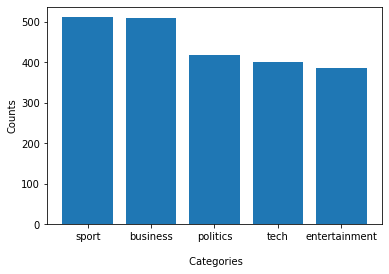

In [3]:
# Visualizing target (category) variable

category_counts = list(bbc_df.category.value_counts())
category_values = list(bbc_df.category.value_counts().keys()) 
print ("The count of each category is: \nsport:{0}, business:{1}, politics:{2}, tech:{3}, entertainment:{4}".format(category_counts[0], category_counts[1], category_counts[2], category_counts[3], category_counts[4]))
plt.bar(category_values, category_counts)
plt.xlabel('\n Categories')
plt.ylabel('Counts')
plt.show()


As seen in the bar chart above, the sport and business categories have the highest frequency in the dataset. There are a total of 511 sport-related texts and 510 business-related texts. For each of the other categories: poltics has 417 texts, tech has 401 texts and entertainment has 386 texts. 

In [4]:
# Descriptions of dataset

text_counts = list()
text_split = list()
for text in bbc_df.text:
  text_split.append(text.split(" "))
  text_counts.append(len(text.split(" ")))
bbc_df["Words"] = text_split
bbc_df["Words_per_text"] = text_counts

print ("Dataset shape: {0}".format(bbc_df.shape))
print()
print ("Dataset descriptions are: \n{0}".format(bbc_df["Words_per_text"].describe()))
print()
print ("Dataframe head is: \n{0}".format(bbc_df.head()))


Dataset shape: (2225, 4)

Dataset descriptions are: 
count    2225.000000
mean      419.757303
std       260.055935
min        94.000000
25%       268.000000
50%       361.000000
75%       514.000000
max      4759.000000
Name: Words_per_text, dtype: float64

Dataframe head is: 
        category  ... Words_per_text
0           tech  ...            806
1       business  ...            332
2          sport  ...            270
3          sport  ...            390
4  entertainment  ...            287

[5 rows x 4 columns]


The shape of the dataset, after inserting the words per text column is (2225, 4) meaning there are 2225 observations and 4 features. The new dataframe with the individual words column and words per text column is printed. 

On average, there are about 420 words per text. The text with the lowest word count has 94 words. The text with the most words has 4759 words. 



### 2) Preprocess your data such that each document in the data is represented as a sequence of equal length.

In [5]:
maxlen = 94 # since the min number of words are 94, we'll cut the number words in a text at 94
training_samples = 1000 # will training on 1000 docs, about half of total
validation_samples = 100000 # will validate on 1000 samples, about half of total
max_words = 100000 # will only consider 100,000 words, about 10% of total words

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(bbc_df.text)
sequences = tokenizer.texts_to_sequences(bbc_df.text)

word_index = tokenizer.word_index
print ("{0} of unique tokens".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)
labels = preprocessing.LabelEncoder()
labels = labels.fit_transform(bbc_df.category)
labels = np.asarray(labels)

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)


29726 of unique tokens
Shape of data tensor: (2225, 94)
Shape of label tensor: (2225,)


### 3)  Use the data to fit separate models to each of the following architectures:

### 3.a. A model with an embedding layer and dense layers (but w/ no layers meant for sequential data)

In [0]:
# Shuffling the data

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# Splitting data into training and testing

x_train = data[:training_samples] 
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [7]:
# Model with embedding layer and dense layer

model1 = Sequential()

model1.add(Embedding(max_words, 8, input_length=maxlen))
model1.add(Flatten())
model1.add(Dense(1, activation ='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

history1 = model1.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=.2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 94, 8)             800000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 752)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 753       
Total params: 800,753
Trainable params: 800,753
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 609us/step - loss: 0.5838 - acc: 0.1762 - val_loss: 0.3794 - val_acc: 0.1500
Epoch 2/10
800/800 [==============================] - 0s 408us/step - loss: -0.0149 - acc: 0.1762 - val_loss: -0.5160 - val_acc: 0.1500
Epoch 3/10
800/800 [==============================] - 0s 408us/step - loss: -1.1265 - acc: 0.1762 - val_loss: -1.9225 - val_acc: 0.1500
Epoch 4/10
800/800 [==============================] - 0s 440us/step - loss: -2.6775 - acc: 0.1762 - val_loss: -3.7697 - val_acc: 0.1500
Epoch 5/10
800/800 [==============================] - 0s 450us/step - loss: -4.6451 - acc: 0.1762 - val_loss: -6.1304 - val_acc: 0.1500
Epoch 6/10
800/800 [==============================] - 0s 435us/step - loss: -7.0715 - acc: 0.1762 - val_loss: -8.9467 - val_acc: 0.1500
Epoch 7/10
800/800 [==============================] - 0s 412us/step - loss: -10.0472 - acc: 0.1762 - val_loss: -12.4199 - val_acc: 0.1500
Ep

### 3.b. A model using an Embedding layer with Conv1d Layers

In [8]:
# Model with 1D Convnet

model2 = Sequential()
model2.add(layers.Embedding(max_words, 128, input_length=maxlen))
model2.add(layers.Conv1D(32, 7, activation='relu'))
model2.add(layers.MaxPooling1D(5))
model2.add(layers.Conv1D(32, 7, activation ='relu'))
model2.add(layers.GlobalMaxPooling1D())
model2.add(layers.Dense(1))

model2.summary()

model2.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 94, 128)           12800000  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 88, 32)            28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 17, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 12,835,937
Trainable params: 12,835,937
Non-trainable params: 0
__________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 2.7962 - acc: 0.2350 - val_loss: 2.3918 - val_acc: 0.2350
Epoch 2/10
800/800 [==============================] - 1s 2ms/step - loss: 1.9942 - acc: 0.2350 - val_loss: 1.9179 - val_acc: 0.2350
Epoch 3/10
800/800 [==============================] - 1s 2ms/step - loss: 1.5196 - acc: 0.2350 - val_loss: 1.4881 - val_acc: 0.2350
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 1.0966 - acc: 0.2350 - val_loss: 1.1194 - val_acc: 0.2350
Epoch 5/10
800/800 [==============================] - 2s 2ms/step - loss: 0.7209 - acc: 0.2688 - val_loss: 0.7560 - val_acc: 0.2000
Epoch 6/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3418 - acc: 0.3237 - val_loss: 0.3872 - val_acc: 0.1600
Epoch 7/10
800/800 [==============================] - 2s 2ms/step - loss: -0.0603 - acc: 0.1988 - val_loss: -0.0145 - val_acc: 0.1500
Epoch 8/10
800/800 [========

### 3.c. A model using an Embedding layer with one sequential layer (LSTM or GRU)

In [9]:
# Model with an LSTM layer

model3 = Sequential()
model3.add(Embedding(max_words, 32))
model3.add(LSTM(32))
model3.add(Dense(1, activation ='sigmoid'))

model3.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics = ['acc'])
history = model3.fit(x_train, y_train, epochs = 10, batch_size=32, validation_split =.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 3s 4ms/step - loss: 0.6663 - acc: 0.1975 - val_loss: 0.6434 - val_acc: 0.1500
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 0.6261 - acc: 0.1762 - val_loss: 0.5958 - val_acc: 0.1500
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 0.5733 - acc: 0.1762 - val_loss: 0.5290 - val_acc: 0.1500
Epoch 4/10
800/800 [==============================] - 3s 3ms/step - loss: 0.4962 - acc: 0.1762 - val_loss: 0.4243 - val_acc: 0.1500
Epoch 5/10
800/800 [==============================] - 2s 3ms/step - loss: 0.3618 - acc: 0.1762 - val_loss: 0.2169 - val_acc: 0.1500
Epoch 6/10
800/800 [==============================] - 2s 3ms/step - loss: -0.0023 - acc: 0.1762 - val_loss: -0.4987 - val_acc: 0.1500
Epoch 7/10
800/800 [==============================] - 2s 3ms/step - loss: -0.9433 - acc: 0.1762 - val_loss: -1.6098 - val_acc: 0.1500
Epoch 8/10
800/800 [======

### 3.d. A model using an Embedding layer with stacked sequential layers (LSTM or GRU)

In [10]:
model4 = Sequential()
model4.add(Embedding(max_words, 32))
model4.add(LSTM(32, return_sequences=True))
model4.add(LSTM(32, return_sequences=False))
model4.add(Dense(1, activation ='sigmoid'))


model4.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics = ['acc'])
history = model4.fit(x_train, y_train, epochs = 10, batch_size=32, validation_split =.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 4s 5ms/step - loss: 0.6405 - acc: 0.1800 - val_loss: 0.5760 - val_acc: 0.1500
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 0.5018 - acc: 0.1762 - val_loss: 0.3753 - val_acc: 0.1500
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 0.2130 - acc: 0.1762 - val_loss: -0.1021 - val_acc: 0.1500
Epoch 4/10
800/800 [==============================] - 3s 4ms/step - loss: -0.6620 - acc: 0.1762 - val_loss: -1.6592 - val_acc: 0.1500
Epoch 5/10
800/800 [==============================] - 3s 4ms/step - loss: -2.3180 - acc: 0.1762 - val_loss: -3.2546 - val_acc: 0.1500
Epoch 6/10
800/800 [==============================] - 3s 4ms/step - loss: -3.2090 - acc: 0.1762 - val_loss: -3.7847 - val_acc: 0.1500
Epoch 7/10
800/800 [==============================] - 3s 4ms/step - loss: -3.5974 - acc: 0.1762 - val_loss: -4.1661 - val_acc: 0.1500
Epoch 8/10
800/800 [=

### 3.e. A model using an Embedding layer with bidirectional sequential layers

In [11]:
# Model with a bidirectional layer

model5 = Sequential()
model5.add(layers.Embedding(max_words, 32))
model5.add(layers.Bidirectional(layers.LSTM(32)))
model5.add(layers.Dense(1, activation ='sigmoid'))

model5.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model5.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 2s 3ms/step - loss: 0.6799 - acc: 0.2200 - val_loss: 0.6581 - val_acc: 0.1550
Epoch 2/10
800/800 [==============================] - 1s 2ms/step - loss: 0.6526 - acc: 0.1775 - val_loss: 0.6349 - val_acc: 0.1500
Epoch 3/10
800/800 [==============================] - 1s 2ms/step - loss: 0.6302 - acc: 0.1762 - val_loss: 0.6114 - val_acc: 0.1500
Epoch 4/10
800/800 [==============================] - 1s 2ms/step - loss: 0.6068 - acc: 0.1762 - val_loss: 0.5855 - val_acc: 0.1500
Epoch 5/10
800/800 [==============================] - 1s 2ms/step - loss: 0.5811 - acc: 0.1762 - val_loss: 0.5581 - val_acc: 0.1500
Epoch 6/10
800/800 [==============================] - 1s 2ms/step - loss: 0.5537 - acc: 0.1762 - val_loss: 0.5286 - val_acc: 0.1500
Epoch 7/10
800/800 [==============================] - 1s 2ms/step - loss: 0.5237 - acc: 0.1762 - val_loss: 0.4946 - val_acc: 0.1500
Epoch 8/10
800/800 [==========

### 3.f. Now retrain your best model from C, D, and E using dropout (you may need to increase epochs!).

In [12]:
# Model 3 retrained

model6 = Sequential()
model6.add(Embedding(max_words, 32))
model6.add(LSTM(32, dropout=.2))
model6.add(Dense(1, activation ='sigmoid'))

model6.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics = ['acc'])
history = model6.fit(x_train, y_train, epochs = 50, batch_size=32, validation_split =.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 3s 3ms/step - loss: 0.6632 - acc: 0.1762 - val_loss: 0.6327 - val_acc: 0.1500
Epoch 2/50
800/800 [==============================] - 3s 3ms/step - loss: 0.6094 - acc: 0.1750 - val_loss: 0.5718 - val_acc: 0.1500
Epoch 3/50
800/800 [==============================] - 3s 3ms/step - loss: 0.5455 - acc: 0.1762 - val_loss: 0.4919 - val_acc: 0.1500
Epoch 4/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4519 - acc: 0.1762 - val_loss: 0.3657 - val_acc: 0.1500
Epoch 5/50
800/800 [==============================] - 3s 4ms/step - loss: 0.2969 - acc: 0.1762 - val_loss: 0.1479 - val_acc: 0.1500
Epoch 6/50
800/800 [==============================] - 3s 3ms/step - loss: -0.0110 - acc: 0.1762 - val_loss: -0.3829 - val_acc: 0.1500
Epoch 7/50
800/800 [==============================] - 3s 3ms/step - loss: -0.8860 - acc: 0.1762 - val_loss: -1.7383 - val_acc: 0.1500
Epoch 8/50
800/800 [======

In [13]:
# Model 4 Retrained

model7 = Sequential()
model7.add(Embedding(max_words, 32))
model7.add(LSTM(32, return_sequences=True, dropout=.2))
model7.add(LSTM(32, return_sequences=False, dropout=.2))
model7.add(Dense(1, activation ='sigmoid'))


model7.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics = ['acc'])
history = model7.fit(x_train, y_train, epochs = 50, batch_size=32, validation_split =.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 5s 6ms/step - loss: 0.6470 - acc: 0.1750 - val_loss: 0.5886 - val_acc: 0.1500
Epoch 2/50
800/800 [==============================] - 3s 4ms/step - loss: 0.5294 - acc: 0.1762 - val_loss: 0.4246 - val_acc: 0.1500
Epoch 3/50
800/800 [==============================] - 3s 4ms/step - loss: 0.3096 - acc: 0.1762 - val_loss: 0.0765 - val_acc: 0.1500
Epoch 4/50
800/800 [==============================] - 3s 4ms/step - loss: -0.2308 - acc: 0.1762 - val_loss: -0.8917 - val_acc: 0.1500
Epoch 5/50
800/800 [==============================] - 3s 4ms/step - loss: -1.6302 - acc: 0.1762 - val_loss: -2.7769 - val_acc: 0.1500
Epoch 6/50
800/800 [==============================] - 3s 4ms/step - loss: -3.0587 - acc: 0.1762 - val_loss: -3.9626 - val_acc: 0.1500
Epoch 7/50
800/800 [==============================] - 3s 4ms/step - loss: -3.7890 - acc: 0.1762 - val_loss: -4.4620 - val_acc: 0.1500
Epoch 8/50
800/800 [==

In [15]:
# Model 5 retrained

model5 = Sequential()
model5.add(layers.Embedding(max_words, 32))
model5.add(layers.Bidirectional(layers.LSTM(32, dropout=.2)))
model5.add(layers.Dense(1, activation ='sigmoid'))

model5.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model5.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 2s 3ms/step - loss: 0.6877 - acc: 0.2138 - val_loss: 0.6768 - val_acc: 0.1400
Epoch 2/50
800/800 [==============================] - 1s 1ms/step - loss: 0.6679 - acc: 0.1825 - val_loss: 0.6604 - val_acc: 0.1550
Epoch 3/50
800/800 [==============================] - 1s 1ms/step - loss: 0.6518 - acc: 0.1762 - val_loss: 0.6445 - val_acc: 0.1500
Epoch 4/50
800/800 [==============================] - 1s 1ms/step - loss: 0.6357 - acc: 0.1762 - val_loss: 0.6279 - val_acc: 0.1500
Epoch 5/50
800/800 [==============================] - 1s 1ms/step - loss: 0.6196 - acc: 0.1762 - val_loss: 0.6103 - val_acc: 0.1500
Epoch 6/50
800/800 [==============================] - 1s 1ms/step - loss: 0.6016 - acc: 0.1762 - val_loss: 0.5913 - val_acc: 0.1500
Epoch 7/50
800/800 [==============================] - 1s 1ms/step - loss: 0.5824 - acc: 0.1762 - val_loss: 0.5709 - val_acc: 0.1500
Epoch 8/50
800/800 [==========

### 4) Discuss 1) which model(s) performed best and speculate about 2) how you might try to further improve the predictive power of your model (e.g. Glove embeddings? More layers? Combining Conv1D with LSTM layers? More LSTM hidden nodes?)

Strangely, my validation accuracy for every model, with every epoch, is .15. I training and validation sizes, which changes the validation accuracy but every ,model still has the same. The loss for each epoch, in each model, is different, so I know that the same model is not being run each time. Given that the validation accuracy is the same for each model, I look to the validation loss to determine the best model. I expect the model with the least deviation from 0 to have the least loss. Given that, my model with bidirectional sequential layers and no dropout (model 5). It returned a validation loss of 0.3639.

To improve the predictive power od the model, I'd use glove embeddings, which would use pretrained weights. 

Github link - 